## Install and import neccesary libralies

In [1]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9fd856d58cb6446fcb2db920fd4077b4b84995800f4eaf57bd19f67e11b4aa49
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
# EDA (pandas-profiling, etc. )
import ydata_profiling as pp
# Feature Processing (Scikit-learn processing, etc. )
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...
# Other packages
import os, pickle
import warnings
warnings.filterwarnings("ignore")

##Upload Dataset and check format

In [4]:
import pandas as pd

# Specify the tab name or index (0-based) you want to read from
sheet_name = 'E Comm'  # Replace with your actual tab name

# Load the data from the specified tab into a DataFrame
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name=sheet_name)


In [30]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Check Null and fill

In [19]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Display the number of null values for each column
print(null_counts)

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [20]:
# Fill missing values
mode_tenure = df['Tenure'].mode()[0]
df['Tenure'].fillna(mode_tenure, inplace=True)

mode_warehouse = df['WarehouseToHome'].mode()[0]
df['WarehouseToHome'].fillna(mode_warehouse, inplace=True)

mode_hour_spend = df['HourSpendOnApp'].mode()[0]
df['HourSpendOnApp'].fillna(mode_hour_spend, inplace=True)

mean_order_hike = df['OrderAmountHikeFromlastYear'].mean()
df['OrderAmountHikeFromlastYear'].fillna(mean_order_hike, inplace=True)

mode_coupon = df['CouponUsed'].mode()[0]
df['CouponUsed'].fillna(mode_coupon, inplace=True)

mode_order_count = df['OrderCount'].mode()[0]
df['OrderCount'].fillna(mode_order_count, inplace=True)

median_days_since = df['DaySinceLastOrder'].median()
df['DaySinceLastOrder'].fillna(median_days_since, inplace=True)

In [21]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Display the number of null values for each column
print(null_counts)

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


Format change

In [22]:
# List of columns that are currently of float type
float_columns = df.select_dtypes(include=['float64']).columns

# Convert the float columns to integer type
df[float_columns] = df[float_columns].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   category
 2   Tenure                       5630 non-null   int64   
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   category
 5   WarehouseToHome              5630 non-null   int64   
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5630 non-null   category
 9   NumberOfDeviceRegistered     5630 non-null   category
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   category
 12  MaritalStatus                5630 non-null   category
 13  Num

Seperate catagorical and numerical column

In [24]:
# Count distinct values for each column
distinct_counts = df.nunique()

# Filter columns with distinct value count less than 7 for categorical columns
categorical_columns = distinct_counts[distinct_counts < 8].index

# Categorize columns based on whether they are in the categorical_columns list
categorical_columns = list(categorical_columns)
numerical_columns = [col for col in df.columns if col not in categorical_columns]

# Convert categorical columns to dtype 'category'
df[categorical_columns] = df[categorical_columns].astype('category')

# Display the updated DataFrame with categorization
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']

Numerical Columns:
['CustomerID', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


##EDA

Distribution between Churn and not Churn

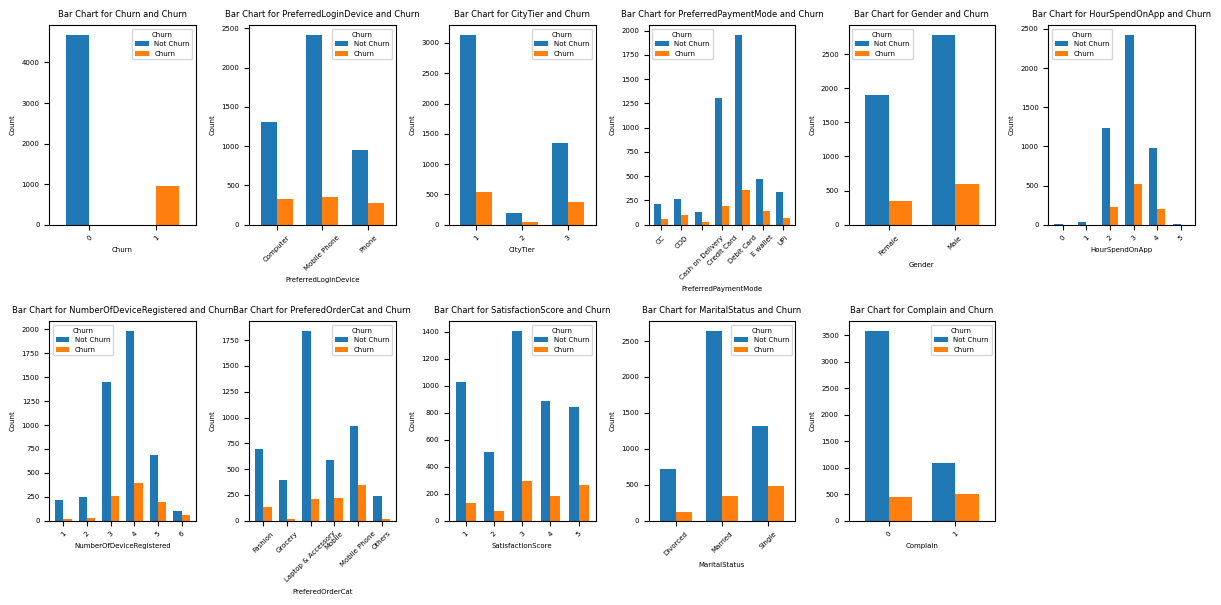

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define the font size for labels and titles
font_size = 5  # You can adjust this size as needed

# Set the font size for Matplotlib's parameters
mpl.rcParams['font.size'] = font_size
mpl.rcParams['axes.labelsize'] = font_size
mpl.rcParams['xtick.labelsize'] = font_size
mpl.rcParams['ytick.labelsize'] = font_size
mpl.rcParams['legend.fontsize'] = font_size

# Define the number of rows and columns for the subplot grid
n_rows = 2  # You can adjust this based on the number of categorical columns
n_cols = (len(categorical_columns) + 1) // 2  # Assuming 2 columns per row

# Create a figure and an array of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6))  # Adjust the figsize as needed

# Calculate a crosstab between categorical columns and Churn
for i, cat_col in enumerate(categorical_columns):
    row = i // n_cols
    col = i % n_cols
    crosstab = pd.crosstab(df[cat_col], df['Churn'])
    crosstab.plot(kind='bar', ax=axs[row, col], width=0.7)  # Adjust the width as needed
    axs[row, col].set_title(f"Bar Chart for {cat_col} and Churn")
    axs[row, col].set_xlabel(cat_col)
    axs[row, col].set_ylabel('Count')
    axs[row, col].legend(title='Churn', labels=['Not Churn', 'Churn'])
    axs[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels if needed

# Remove any empty subplots
for i in range(len(categorical_columns), n_rows * n_cols):
    fig.delaxes(axs.flatten()[i])

# Adjust spacing between subplots
plt.tight_layout(h_pad=2, w_pad=2)  # Adjust h_pad and w_pad as needed

# Show the combined plot
plt.show()


##distribution of numerical column

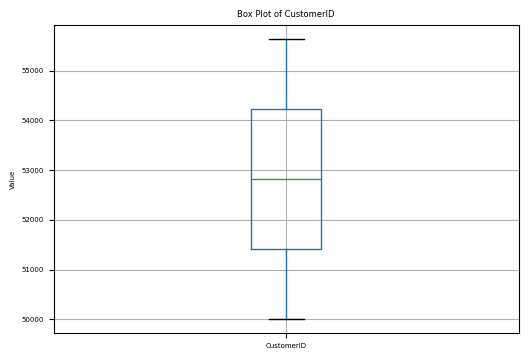

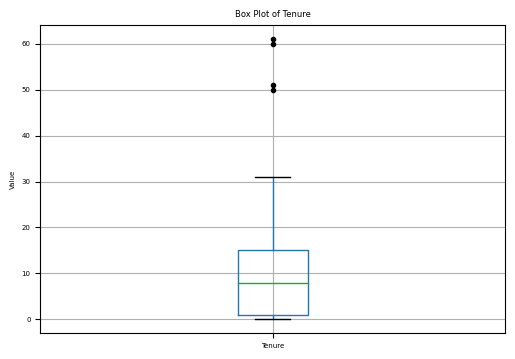

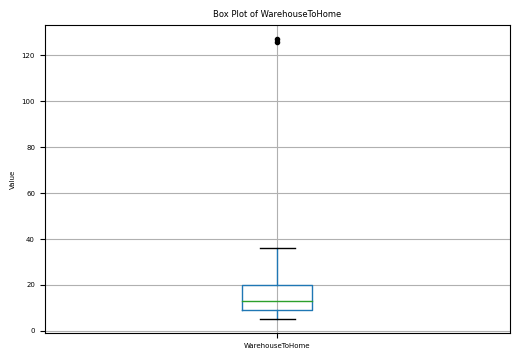

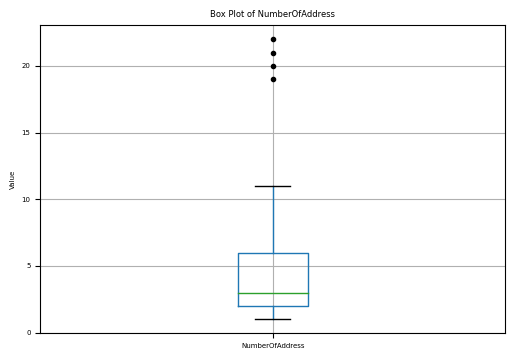

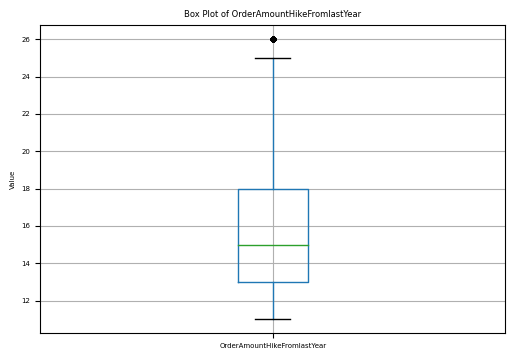

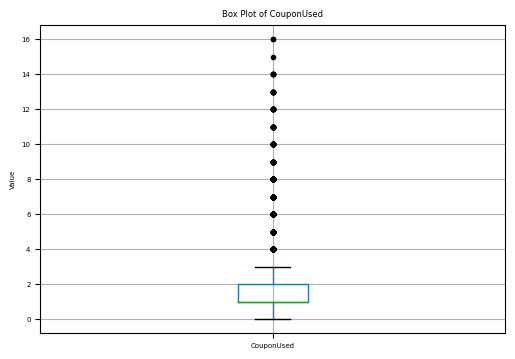

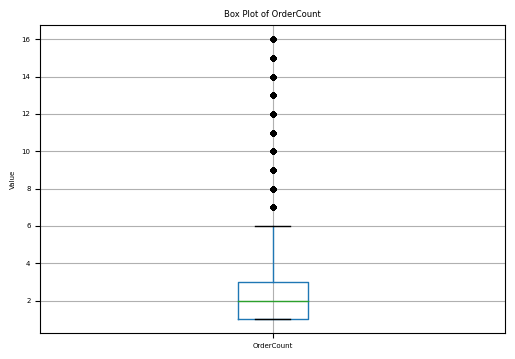

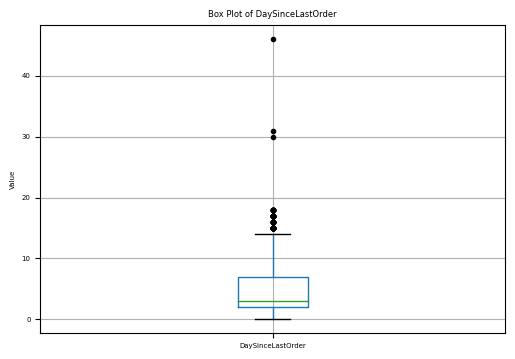

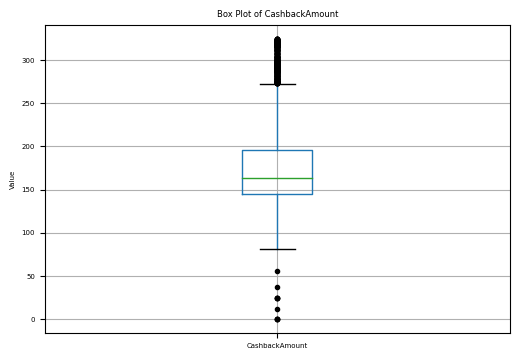

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot separate box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    df[[column]].boxplot(sym='k.')
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()


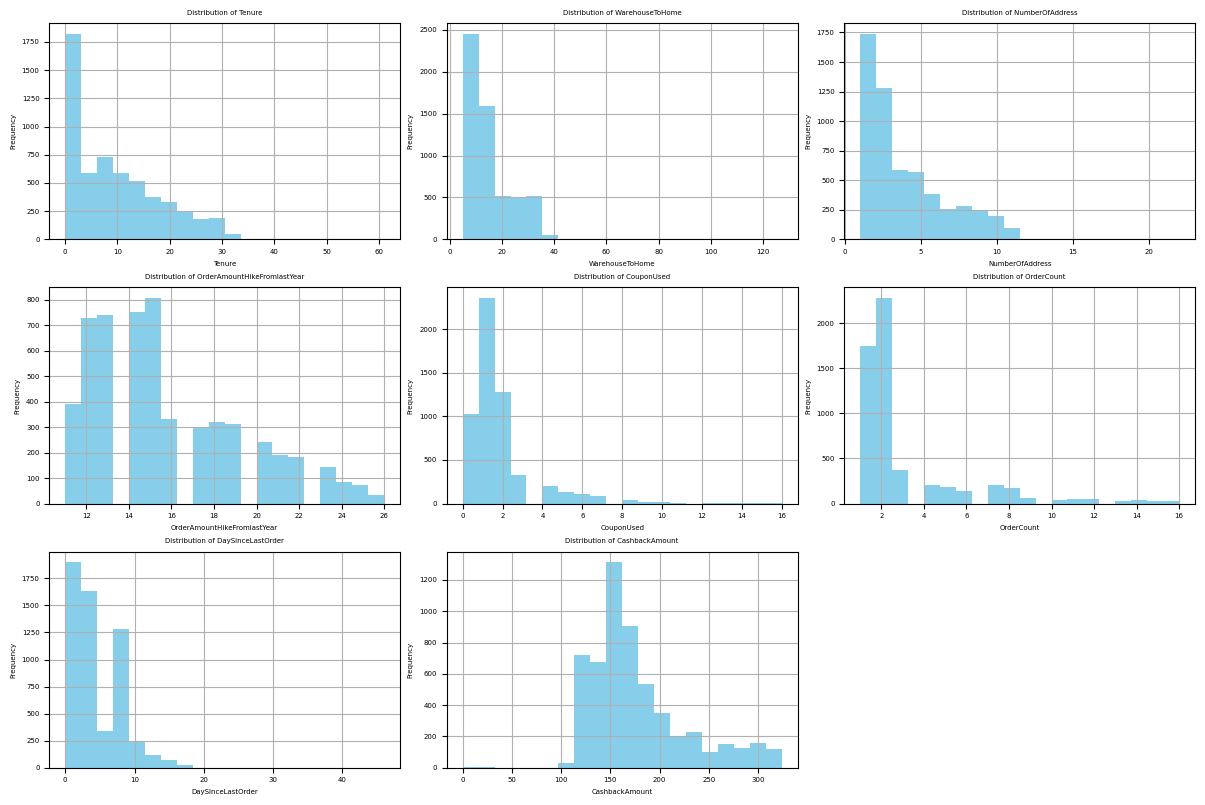

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tabulate import tabulate

# ... (Previous code)

# Exclude 'CustomerID' column from numerical columns
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'CustomerID']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    df_encoded[col].hist(bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ... (Rest of the code, including model evaluation and tabulate)


Co-relation of parameter

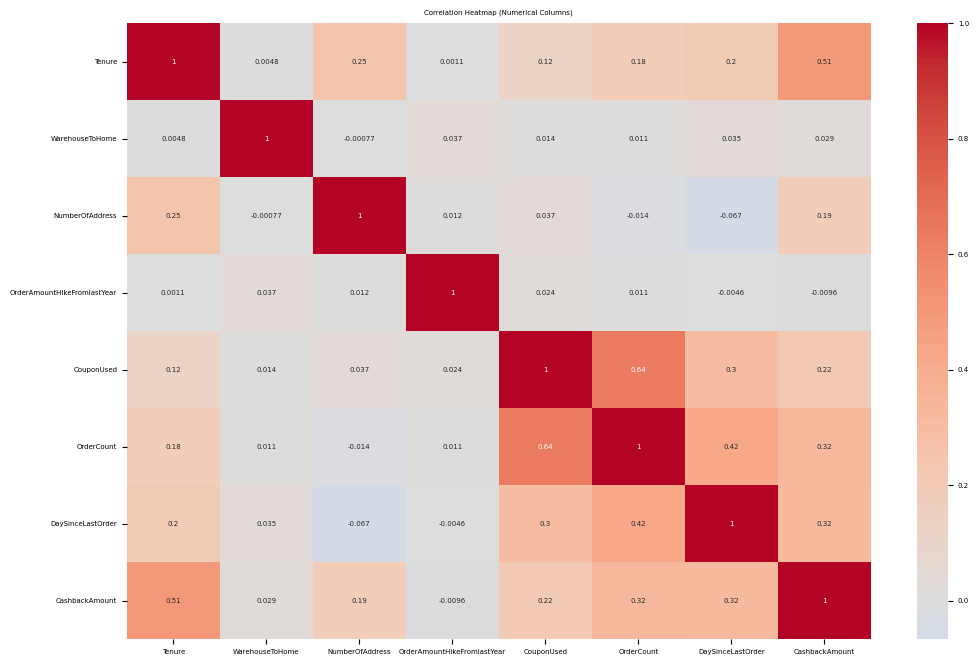

In [31]:
import seaborn as sns
from scipy.stats import chi2_contingency

# Calculate correlation matrix for numerical columns (excluding 'CustomerID')
numerical_columns_without_id = [col for col in numerical_columns if col != 'CustomerID']
correlation_matrix = df[numerical_columns_without_id].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()


<Figure size 1000x600 with 0 Axes>

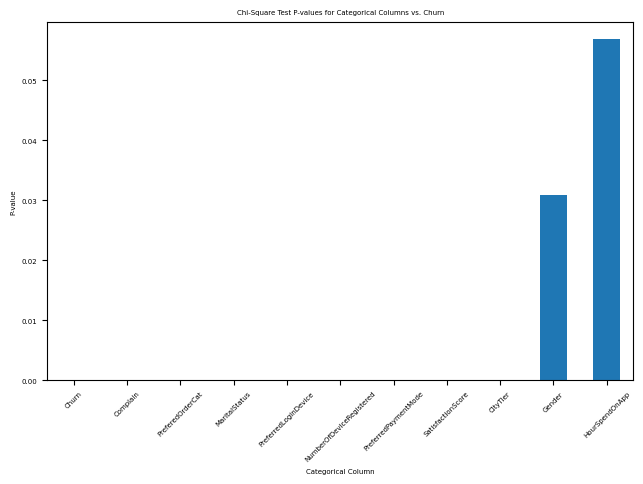

In [32]:
import matplotlib.pyplot as plt

# Perform chi-square tests for each categorical column and store p-values
p_values = {}
for cat_col in categorical_columns:
    contingency_table = pd.crosstab(df[cat_col], df['Churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    p_values[cat_col] = p_value

# Convert the p-values dictionary to a DataFrame for plotting
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])

# Sort the DataFrame by p-value
p_values_df = p_values_df.sort_values(by='P-value')

# Create a bar plot of p-values
plt.figure(figsize=(10, 6))
p_values_df.plot(kind='bar', legend=False)
plt.title("Chi-Square Test P-values for Categorical Columns vs. Churn")
plt.ylabel("P-value")
plt.xlabel("Categorical Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Encode categorical column

In [33]:
print (categorical_columns)

['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']


In [34]:
# List of categorical columns
categorical_columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   CustomerID Churn  Tenure  WarehouseToHome  NumberOfAddress  \
0       50001     1       4                6                9   
1       50002     1       1                8                7   
2       50003     1       1               30                6   
3       50004     1       0               15                8   
4       50005     1       0               12                3   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                           11           1           1                  5   
1                           15           0           1                  0   
2                           14           0           1                  3   
3                           23           0           1                  3   
4                           11           1           1                  3   

   CashbackAmount  ...  PreferedOrderCat_Mobile  \
0             159  ...                        0   
1             120  ...                      

## Model

In [35]:
!pip install imbalanced-learn

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   CustomerID                             5630 non-null   int64   
 1   Churn                                  5630 non-null   category
 2   Tenure                                 5630 non-null   int64   
 3   WarehouseToHome                        5630 non-null   int64   
 4   NumberOfAddress                        5630 non-null   int64   
 5   OrderAmountHikeFromlastYear            5630 non-null   int64   
 6   CouponUsed                             5630 non-null   int64   
 7   OrderCount                             5630 non-null   int64   
 8   DaySinceLastOrder                      5630 non-null   int64   
 9   CashbackAmount                         5630 non-null   int64   
 10  PreferredLoginDevice_Mobile Phone      5630 non-null   uint8

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tabulate import tabulate  # Import tabulate

# Splitting the data into features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of classification models
classification_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Define a dictionary of sampling techniques
sampling_techniques = {
    'Oversampling': RandomOverSampler(sampling_strategy='minority', random_state=42),
    'Undersampling': RandomUnderSampler(sampling_strategy='majority', random_state=42),
    'SMOTE': SMOTE(sampling_strategy='auto', random_state=42)
}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Technique', 'Model', 'Precision', 'Recall', 'F1-Score'])

# Loop through each sampling technique
for technique, sampler in sampling_techniques.items():
    # Resample the training data
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_scaled, y_train)

    # Loop through each classification model
    for model_name, model in classification_models.items():
        # Train the model on the resampled training data
        model.fit(X_train_resampled, y_train_resampled)

        # Predictions on the test data
        y_pred = model.predict(X_test_scaled)

        # Evaluate the model using classification report
        class_rep = classification_report(y_test, y_pred, output_dict=True)
        results_df = results_df.append({
            'Technique': technique,
            'Model': model_name,
            'Precision': class_rep['weighted avg']['precision'],
            'Recall': class_rep['weighted avg']['recall'],
            'F1-Score': class_rep['weighted avg']['f1-score']
        }, ignore_index=True)

# Display the results in a table format with headers colored and lines separating rows
table = tabulate(results_df, headers='keys', tablefmt='pretty', numalign='center')
print(table)


+----+---------------+------------------------+--------------------+--------------------+--------------------+
|    |   Technique   |         Model          |     Precision      |       Recall       |      F1-Score      |
+----+---------------+------------------------+--------------------+--------------------+--------------------+
| 0  | Oversampling  |     Random Forest      | 0.974955389657794  | 0.9751332149200711 | 0.9746760662573286 |
| 1  | Oversampling  |  Logistic Regression   | 0.8784779231613734 | 0.8117229129662522 | 0.8307253858870283 |
| 2  | Oversampling  | Support Vector Machine | 0.9255673942986943 | 0.9103019538188277 |  0.91488806174478  |
| 3  | Oversampling  |   Gradient Boosting    | 0.9083064006085143 | 0.8845470692717584 | 0.8918054485819226 |
| 4  | Oversampling  |        XGBoost         | 0.9703244325086897 | 0.9706927175843695 | 0.9703971336924075 |
| 5  | Undersampling |     Random Forest      | 0.9209381930222033 | 0.8934280639431617 | 0.9009260552830728 |
|

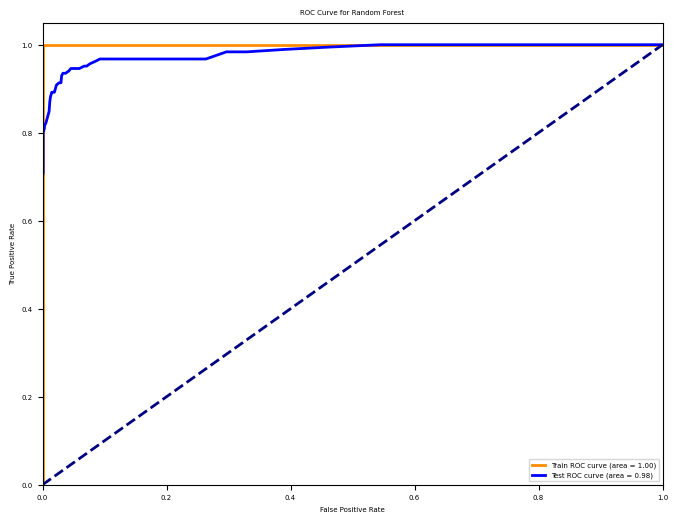

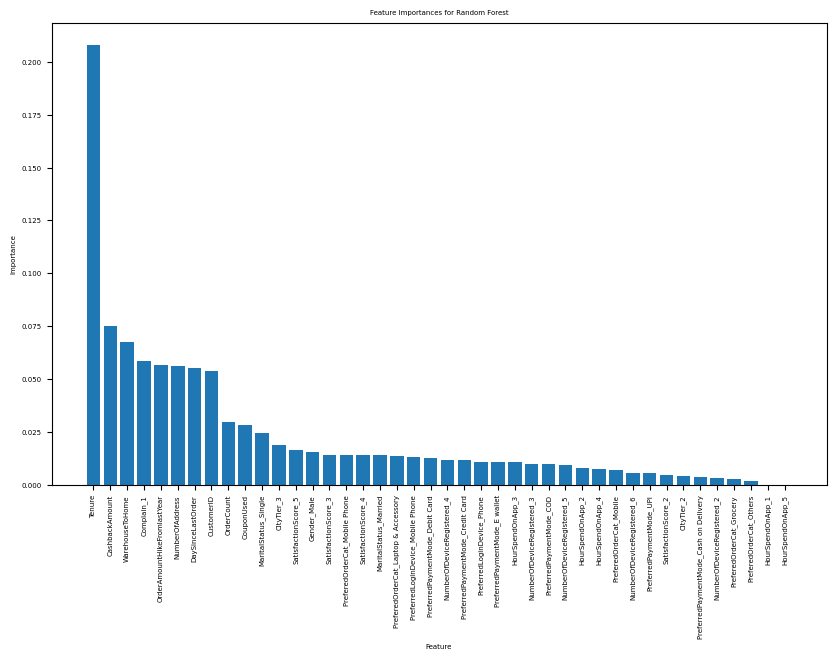

In [47]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import numpy as np


# Determine the best-performing model based on F1-Score
best_model_name = results_df.loc[results_df['F1-Score'].idxmax()]['Model']
best_model = classification_models[best_model_name]

# Train the best-performing model on the entire training data
best_model.fit(X_train_scaled, y_train)

# Predict probabilities on the training data for ROC curve
y_train_pred_proba = best_model.predict_proba(X_train_scaled)[:, 1]
# Predict probabilities on the test data for ROC curve
y_test_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and ROC-AUC score for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)
# Calculate ROC curve and ROC-AUC score for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for both training and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc='lower right')
plt.show()

# Get feature importances for the best model (assuming it's a tree-based model)
if isinstance(best_model, (RandomForestClassifier, GradientBoostingClassifier, XGBClassifier)):
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    # Sort feature importances in descending order
    sorted_idx = np.argsort(feature_importances)[::-1]
    feature_importances_sorted = feature_importances[sorted_idx]
    feature_names_sorted = feature_names[sorted_idx]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances_sorted)), feature_importances_sorted)
    plt.xticks(range(len(feature_importances_sorted)), feature_names_sorted, rotation=90)
    plt.title(f'Feature Importances for {best_model_name}')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()
else:
    print("Feature importances are not available for this model type.")